In [ ]:
# import libraries
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


## **1.1 Loading and inspecting data**

In [ ]:
df = pd.read_csv('FoodieBay.csv')
df.head()

,url,address,name,phone,location,rest_type,cuisines,menu_item,listed_in_type,listed_in_city,online_order,book_table,ave_cost_for_two,dish_liked,votes,ave_review_ranking,rate
0,https://www.zomato.com/bangalore/d2v-cafe-1-ba...,"173/218, GF, Opposite Ranka Colony, Bannerghat...",D2V Cafe,+91 9886986111\r\n+91 8550051111,Bannerghatta Road,Cafe,Cafe,[],Cafes,JP Nagar,No,No,700.0,NaN,13,4.75,3.6
1,https://www.zomato.com/bangalore/the-burger-pl...,"2nd Floor, MMR Plaza, Above DCB Bank, Sarjapur...",The Burger Place,+91 9108974600,Koramangala 1st Block,Quick Bites,"Burger, Continental, Fast Food",[],Dine-out,Koramangala 5th Block,Yes,No,400.0,NaN,28,4.50,3.8
2,https://www.zomato.com/bangalore/millet-mama-b...,"Next To Surana College, South End Circle, Basa...",Millet Mama,+91 7411918648\r\n+91 9986975625,Basavanagudi,Quick Bites,"South Indian, Healthy Food",[],Delivery,Jayanagar,Yes,No,200.0,NaN,18,4.00,3.9
3,https://www.zomato.com/bangalore/red-onion-sha...,"Money Chambers Double Road, Shanti Nagar, Bang...",Red Onion,+91 8867253669,Shanti Nagar,Casual Dining,"Chinese, North Indian, Biryani, Kebab","['Hyderabadi Biryani', 'Special Veg Combo', 'S...",Delivery,Brigade Road,Yes,Yes,1200.0,"Fish, Dumplings, Biryani, Paneer Tikka Masala,...",550,4.80,4.3
4,https://www.zomato.com/bangalore/chaiywaala-da...,"Shop 67, 69, 70, Inside Ramaiah Campus, New BE...",Chaiywaala Da Dhaba,+91 8217431260\n+91 7975991975,New BEL Road,Cafe,"Cafe, Tea",[],Dine-out,New BEL Road,Yes,No,250.0,"Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...",67,3.00,3.7


## **1.2 Pre-processing data and EDA**

### **Inspecting and cleansing data**



In [ ]:
df.columns

Index(['url', 'address', 'name', 'phone', 'location', 'rest_type', 'cuisines',
       'menu_item', 'listed_in_type', 'listed_in_city', 'online_order',
       'book_table', 'ave_cost_for_two', 'dish_liked', 'votes',
       'ave_review_ranking', 'rate'],
      dtype='object')

In [ ]:
df.describe()

,ave_cost_for_two,votes,ave_review_ranking,rate
count,39890.000000,40130.000000,33751.000000,31794.000000
mean,506.697293,225.685547,3.588297,3.657275
std,324.164372,598.568781,0.913524,0.431129
min,40.000000,0.000000,1.000000,1.800000
25%,300.000000,6.000000,3.000000,3.400000
50%,400.000000,36.000000,3.727273,3.700000
75%,600.000000,174.000000,4.142857,4.000000
max,2500.000000,12121.000000,5.000000,4.900000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40130 entries, 0 to 40129
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 40130 non-null  object 
 1   address             40130 non-null  object 
 2   name                40130 non-null  object 
 3   phone               39246 non-null  object 
 4   location            40130 non-null  object 
 5   rest_type           40130 non-null  object 
 6   cuisines            40112 non-null  object 
 7   menu_item           40130 non-null  object 
 8   listed_in_type      40130 non-null  object 
 9   listed_in_city      40130 non-null  object 
 10  online_order        40130 non-null  object 
 11  book_table          40130 non-null  object 
 12  ave_cost_for_two    39890 non-null  float64
 13  dish_liked          17351 non-null  object 
 14  votes               40130 non-null  int64  
 15  ave_review_ranking  33751 non-null  float64
 16  rate

In [ ]:
df.isnull().sum()

url                       0
address                   0
name                      0
phone                   884
location                  0
rest_type                 0
cuisines                 18
menu_item                 0
listed_in_type            0
listed_in_city            0
online_order              0
book_table                0
ave_cost_for_two        240
dish_liked            22779
votes                     0
ave_review_ranking     6379
rate                   8336
dtype: int64

In [ ]:
# Visualize all column missing values using plotly
import plotly.express as px

fig = px.bar(df.isnull().sum(), x=df.isnull().sum().index, y=df.isnull().sum().values, color=df.isnull().sum().values)

fig.update_layout(title_text='Missing Values in the Dataset', title_x=0.5)

fig.show()


In [ ]:
#drop dish_liked column , ave_review_ranking column and rate

df.drop(['dish_liked','ave_review_ranking','rate'],axis=1,inplace=True)

df.head()



,url,address,name,phone,location,rest_type,cuisines,menu_item,listed_in_type,listed_in_city,online_order,book_table,ave_cost_for_two,votes
0,https://www.zomato.com/bangalore/d2v-cafe-1-ba...,"173/218, GF, Opposite Ranka Colony, Bannerghat...",D2V Cafe,+91 9886986111\r\n+91 8550051111,Bannerghatta Road,Cafe,Cafe,[],Cafes,JP Nagar,No,No,700.0,13
1,https://www.zomato.com/bangalore/the-burger-pl...,"2nd Floor, MMR Plaza, Above DCB Bank, Sarjapur...",The Burger Place,+91 9108974600,Koramangala 1st Block,Quick Bites,"Burger, Continental, Fast Food",[],Dine-out,Koramangala 5th Block,Yes,No,400.0,28
2,https://www.zomato.com/bangalore/millet-mama-b...,"Next To Surana College, South End Circle, Basa...",Millet Mama,+91 7411918648\r\n+91 9986975625,Basavanagudi,Quick Bites,"South Indian, Healthy Food",[],Delivery,Jayanagar,Yes,No,200.0,18
3,https://www.zomato.com/bangalore/red-onion-sha...,"Money Chambers Double Road, Shanti Nagar, Bang...",Red Onion,+91 8867253669,Shanti Nagar,Casual Dining,"Chinese, North Indian, Biryani, Kebab","['Hyderabadi Biryani', 'Special Veg Combo', 'S...",Delivery,Brigade Road,Yes,Yes,1200.0,550
4,https://www.zomato.com/bangalore/chaiywaala-da...,"Shop 67, 69, 70, Inside Ramaiah Campus, New BE...",Chaiywaala Da Dhaba,+91 8217431260\n+91 7975991975,New BEL Road,Cafe,"Cafe, Tea",[],Dine-out,New BEL Road,Yes,No,250.0,67


In [ ]:
# check duplicated
df.duplicated().sum()


0

In [ ]:
df.drop('url',axis=1,inplace=True)
df

,address,name,phone,location,rest_type,cuisines,menu_item,listed_in_type,listed_in_city,online_order,book_table,ave_cost_for_two,votes
0,"173/218, GF, Opposite Ranka Colony, Bannerghat...",D2V Cafe,+91 9886986111\r\n+91 8550051111,Bannerghatta Road,Cafe,Cafe,[],Cafes,JP Nagar,No,No,700.0,13
1,"2nd Floor, MMR Plaza, Above DCB Bank, Sarjapur...",The Burger Place,+91 9108974600,Koramangala 1st Block,Quick Bites,"Burger, Continental, Fast Food",[],Dine-out,Koramangala 5th Block,Yes,No,400.0,28
2,"Next To Surana College, South End Circle, Basa...",Millet Mama,+91 7411918648\r\n+91 9986975625,Basavanagudi,Quick Bites,"South Indian, Healthy Food",[],Delivery,Jayanagar,Yes,No,200.0,18
3,"Money Chambers Double Road, Shanti Nagar, Bang...",Red Onion,+91 8867253669,Shanti Nagar,Casual Dining,"Chinese, North Indian, Biryani, Kebab","['Hyderabadi Biryani', 'Special Veg Combo', 'S...",Delivery,Brigade Road,Yes,Yes,1200.0,550
4,"Shop 67, 69, 70, Inside Ramaiah Campus, New BE...",Chaiywaala Da Dhaba,+91 8217431260\n+91 7975991975,New BEL Road,Cafe,"Cafe, Tea",[],Dine-out,New BEL Road,Yes,No,250.0,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40125,"ACES Layout Road, Kundanahalli Gate, Brookefie...",Yumlane,NaN,Brookefield,"Takeaway, Delivery","Pizza, Fast Food",[],Delivery,Whitefield,No,No,NaN,25
40126,"18, 2nd H Cross, Dodda Banaswadi Main Road, Ne...",American Desserts,+91 9686415784,Banaswadi,"Takeaway, Delivery","Desserts, Bakery",[],Delivery,Kammanahalli,Yes,No,500.0,23
40127,"113, MG Road, Bangalore",New Arya Bhavan,080 40913062,MG Road,Quick Bites,"Street Food, Beverages, North Indian",[],Delivery,MG Road,No,No,300.0,23
40128,"2334, Aarush Arcade, 17th Cross, 1st Sector, H...",Le Charcoal Xpress,+91 9036300066\r\n+91 9036300088,HSR,Quick Bites,"Arabian, BBQ, Rolls, Chinese",[],Delivery,Bellandur,Yes,No,500.0,162


In [ ]:
#check null values
df.isnull().sum()



address               0
name                  0
phone               884
location              0
rest_type             0
cuisines             18
menu_item             0
listed_in_type        0
listed_in_city        0
online_order          0
book_table            0
ave_cost_for_two    240
votes                 0
dtype: int64

### **EDA**


1. Univariate analysis
2. Bivariate analysis
3. Multivariate analysis

<ipython-input-12-c6ab3637a3a8>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='votes', ylabel='Density'>

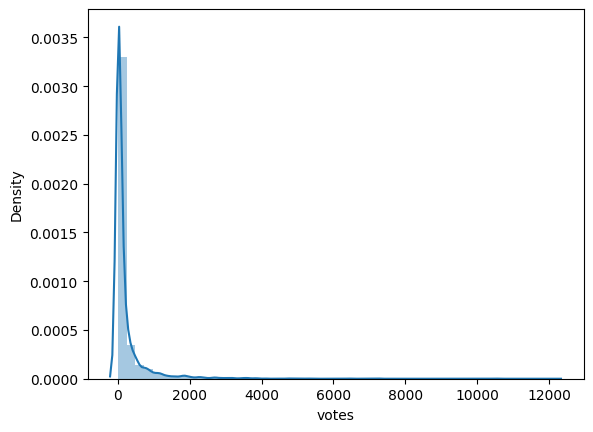

In [ ]:
#univariate analysis

#check the distribution of votes

sns.distplot(df['votes'])






In [ ]:

# Categorical Variables
categorical_variables = ["location", "rest_type", "cuisines", "listed_in_type", "listed_in_city", "online_order", "book_table"]
for var in categorical_variables:
    print(f"\n{var}:\n{df[var].value_counts()}\n")





location:
BTM                      4422
HSR                      2100
JP Nagar                 1769
Koramangala 5th Block    1721
Whitefield               1590
                         ... 
West Bangalore              3
Sankey Road                 3
Central Bangalore           3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64


rest_type:
Quick Bites           19132
Casual Dining         10330
Cafe                   3732
Delivery               2604
Takeaway, Delivery     2037
Casual Dining, Bar     1154
Bakery                 1141
Name: rest_type, dtype: int64


cuisines:
North Indian                                    2723
North Indian, Chinese                           2222
South Indian                                    1740
Biryani                                          897
Fast Food                                        755
                                                ... 
American, Continental, Salad, Italian, Asian     

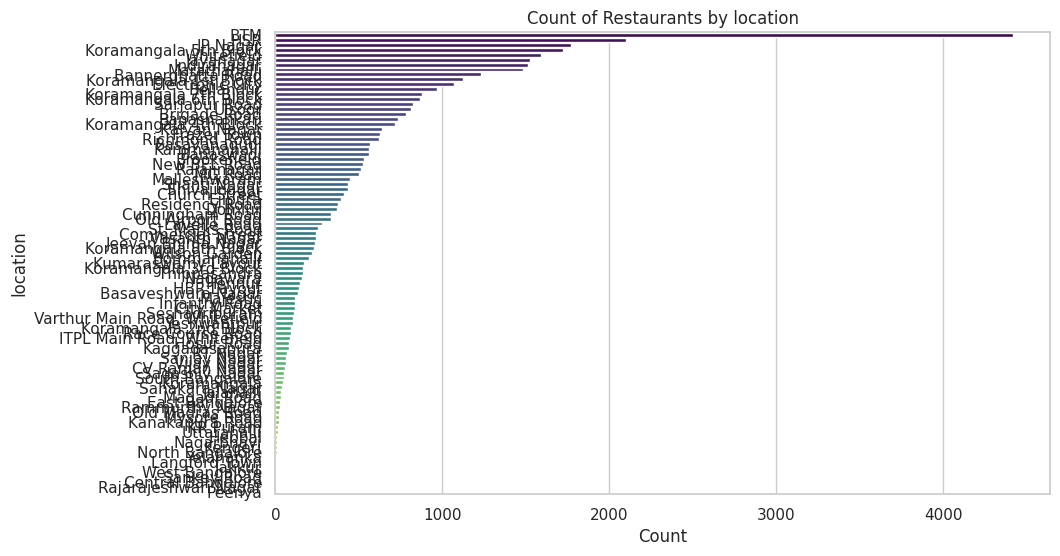

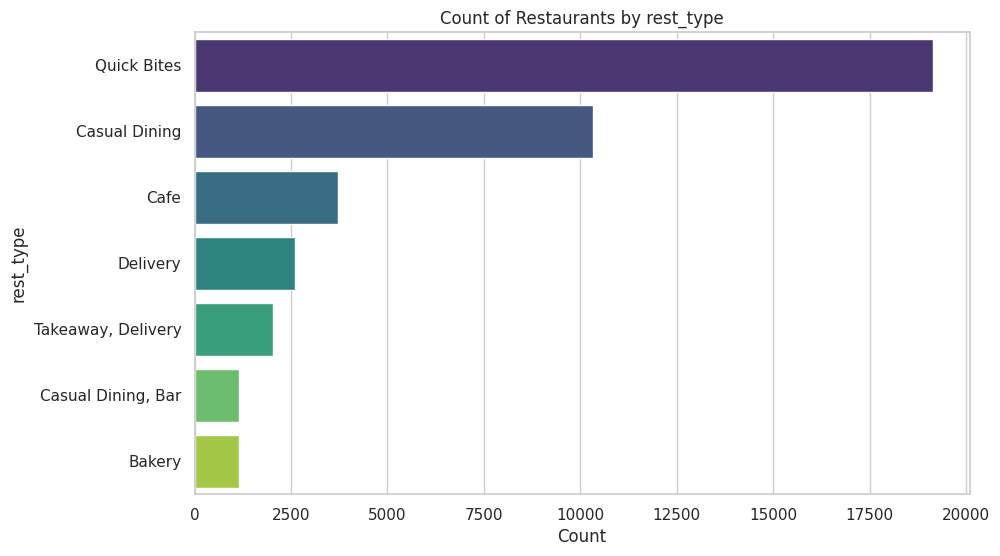

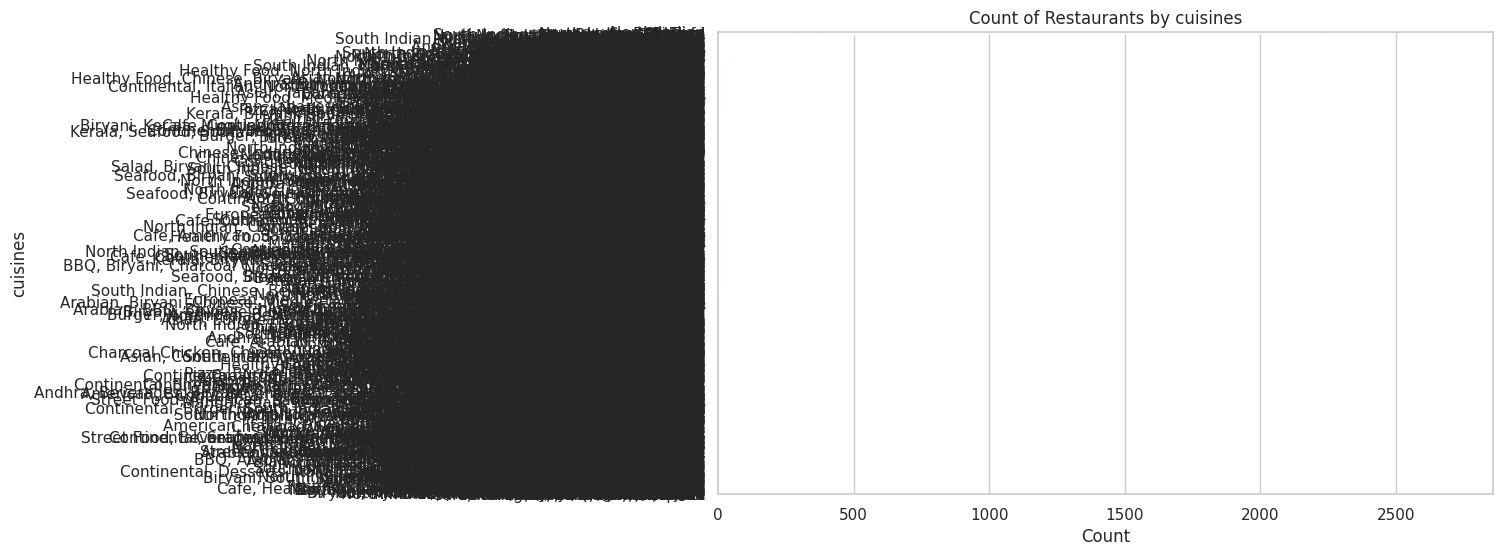

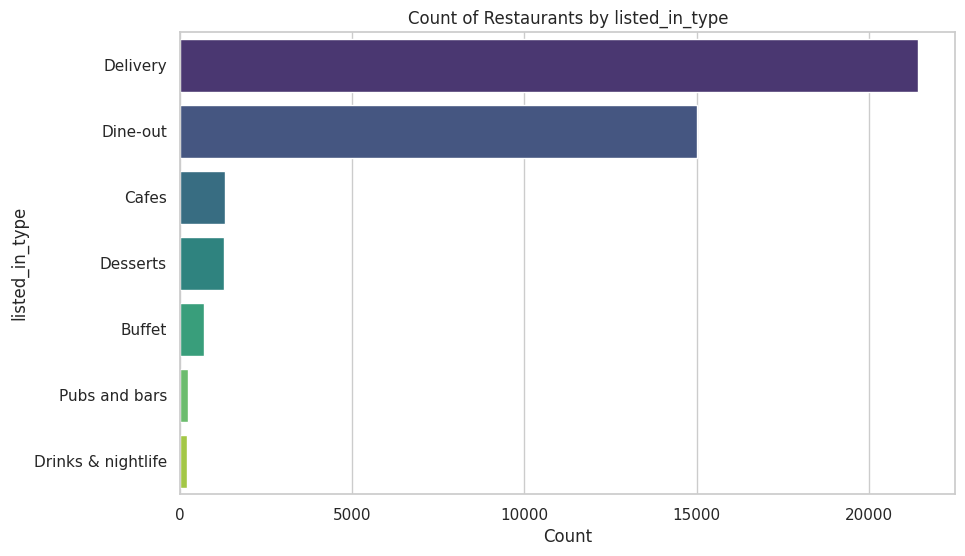

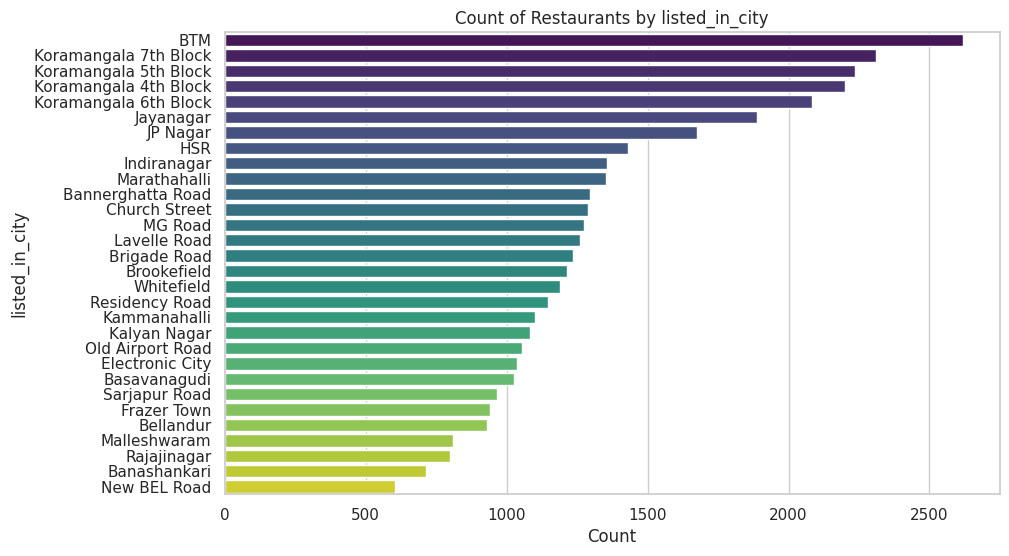

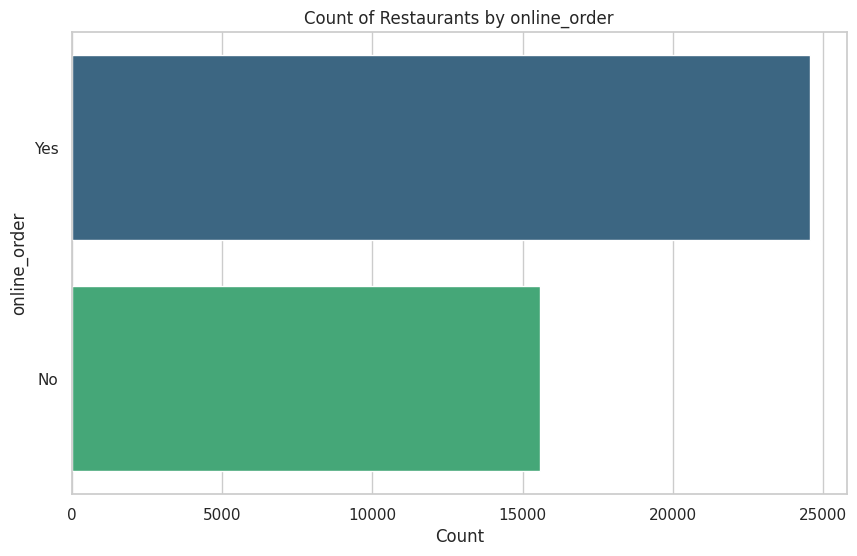

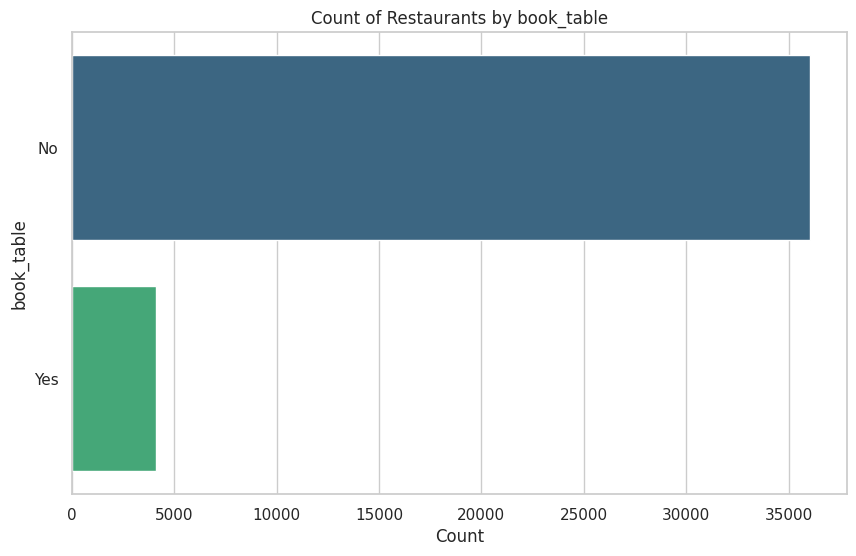

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Categorical Variables
for var in categorical_variables:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=var, order=df[var].value_counts().index, palette='viridis')
    plt.title(f'Count of Restaurants by {var}')
    plt.xlabel('Count')
    plt.ylabel(var)
    plt.show()

In [ ]:
# Numeric Variables
numeric_variables = ["ave_cost_for_two", "votes"]  # Corrected the column name
for var in numeric_variables:
    print(f"\n{var}:")
    print("Mean:", df[var].mean())
    print("Median:", df[var].median())
    print("Minimum:", df[var].min())
    print("Maximum:", df[var].max())
    print("Standard Deviation:", df[var].std())


ave_cost_for_two:
Mean: 506.69729255452495
Median: 400.0
Minimum: 40.0
Maximum: 2500.0
Standard Deviation: 324.1643723398782

votes:
Mean: 225.6855469723399
Median: 36.0
Minimum: 0
Maximum: 12121
Standard Deviation: 598.5687810387881


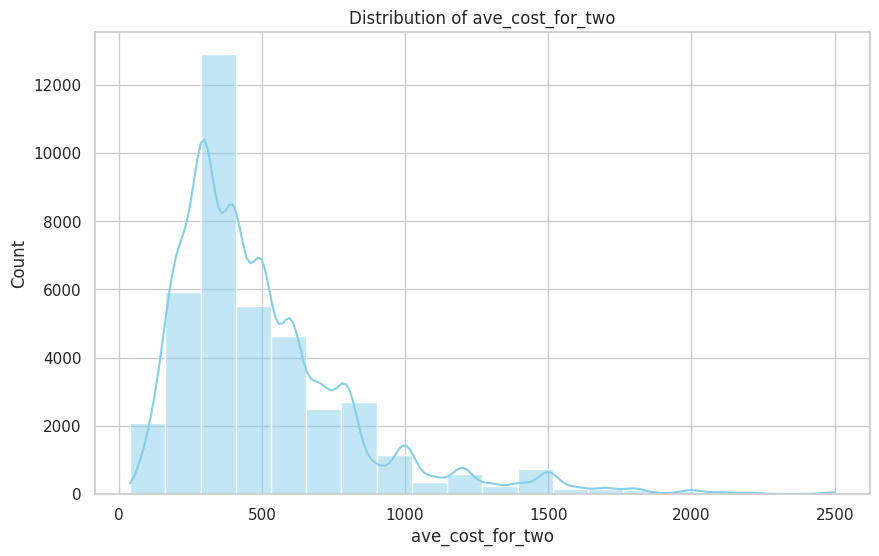

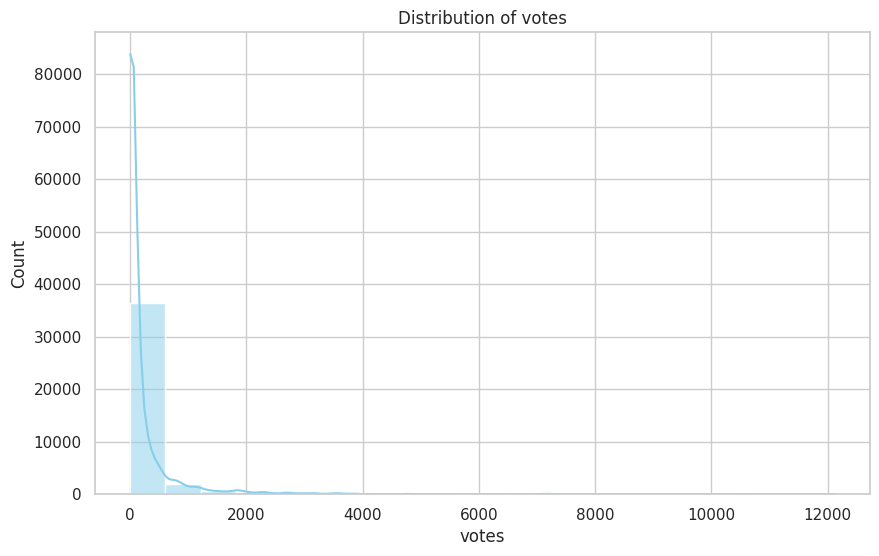

In [ ]:
# Numeric Variables
for var in numeric_variables:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

## **Bivariate Analysis**

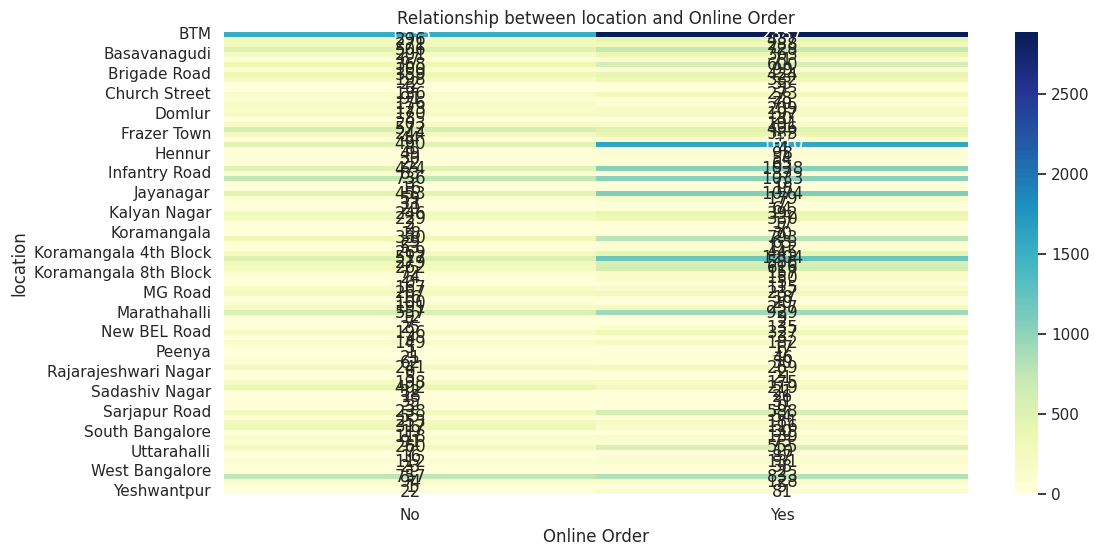

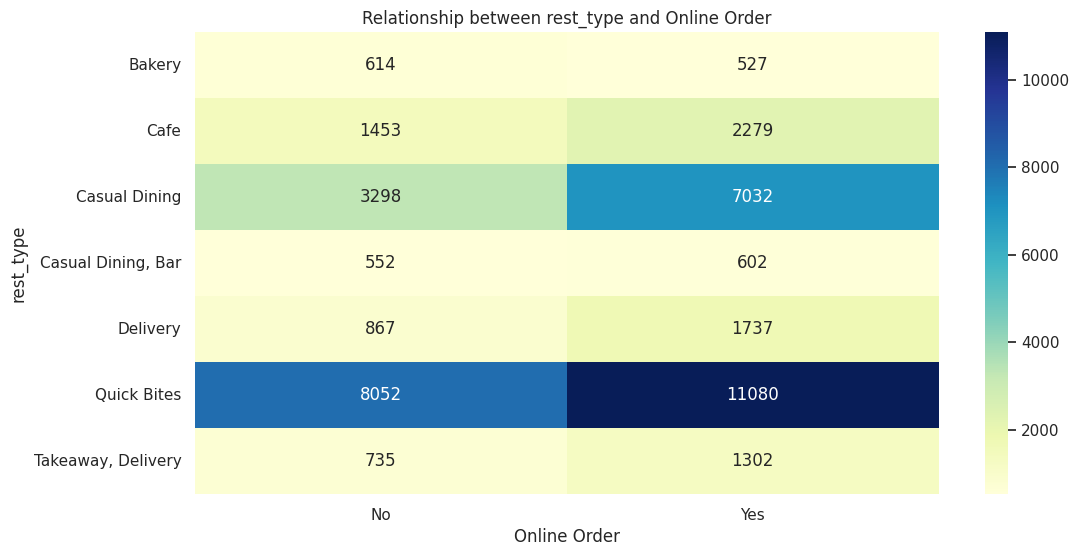

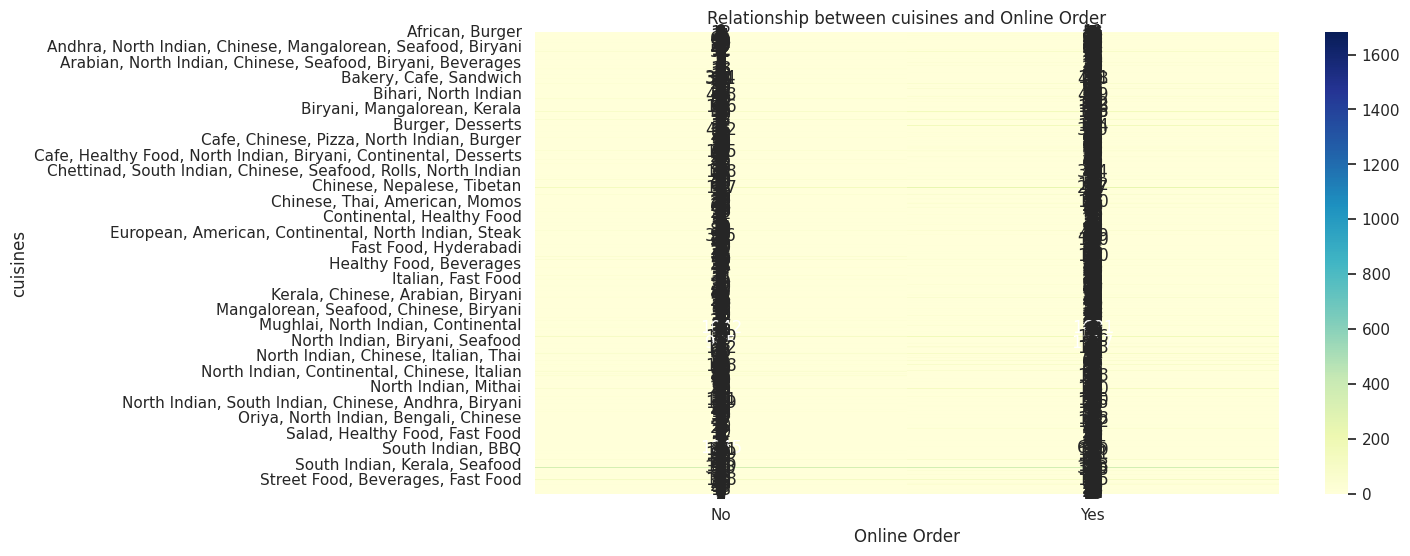

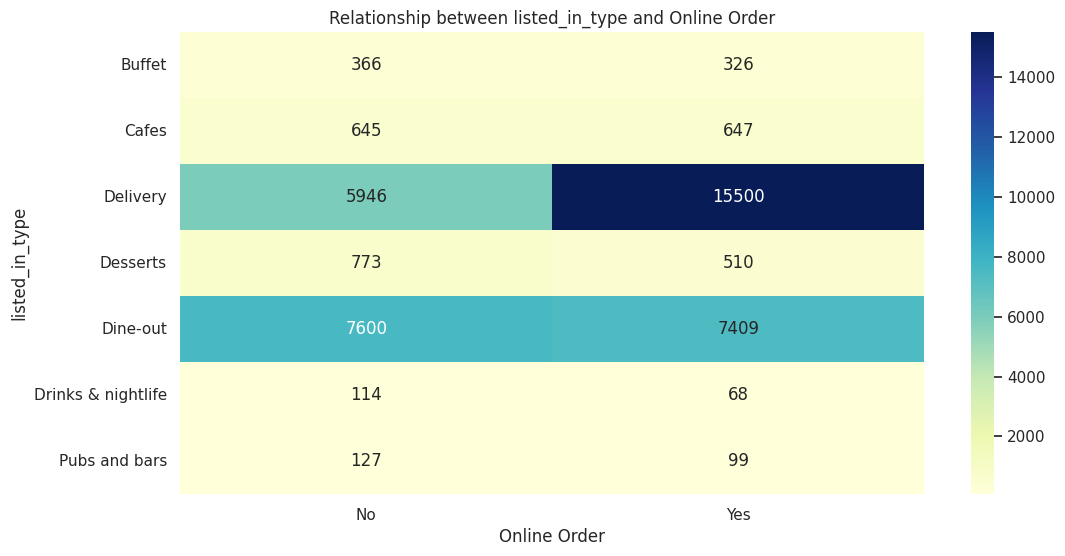

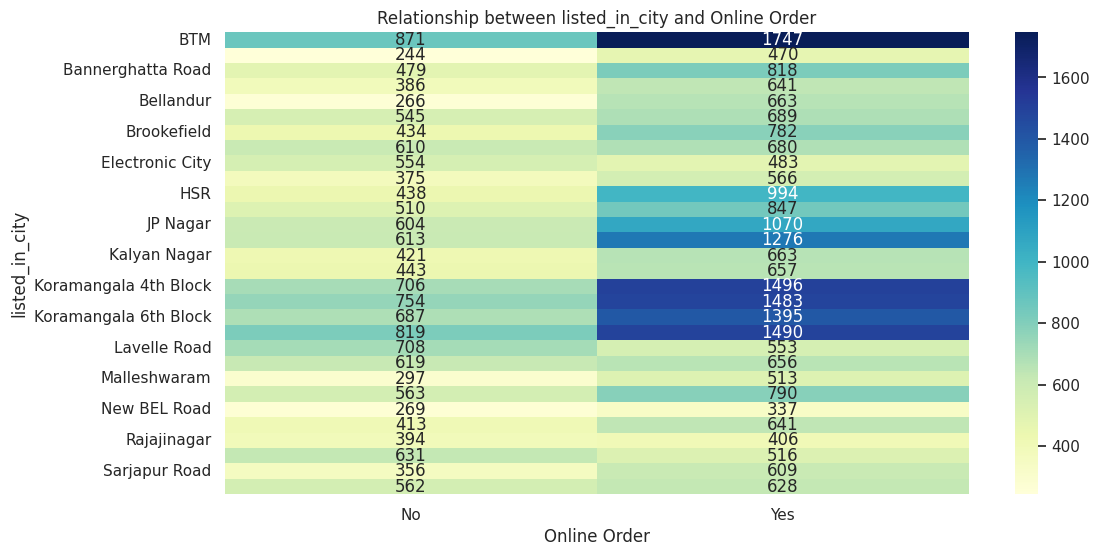

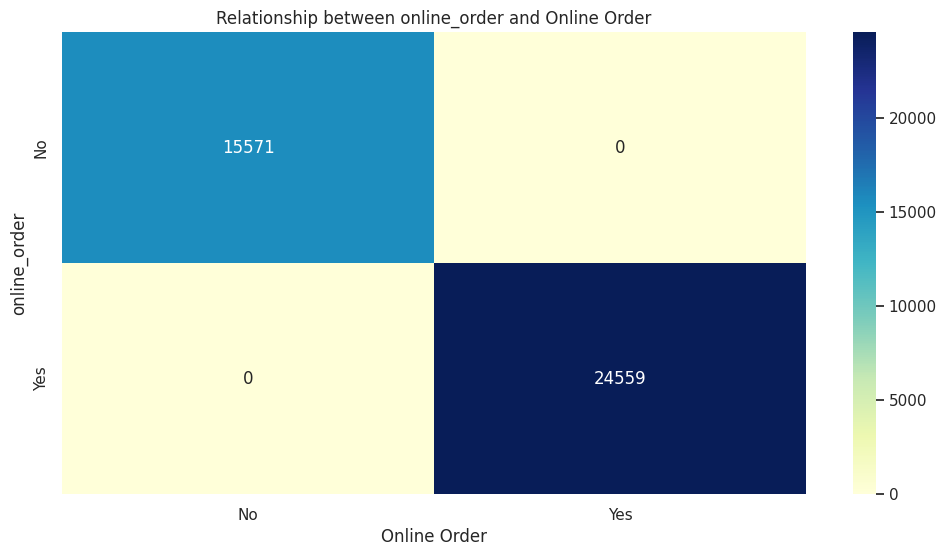

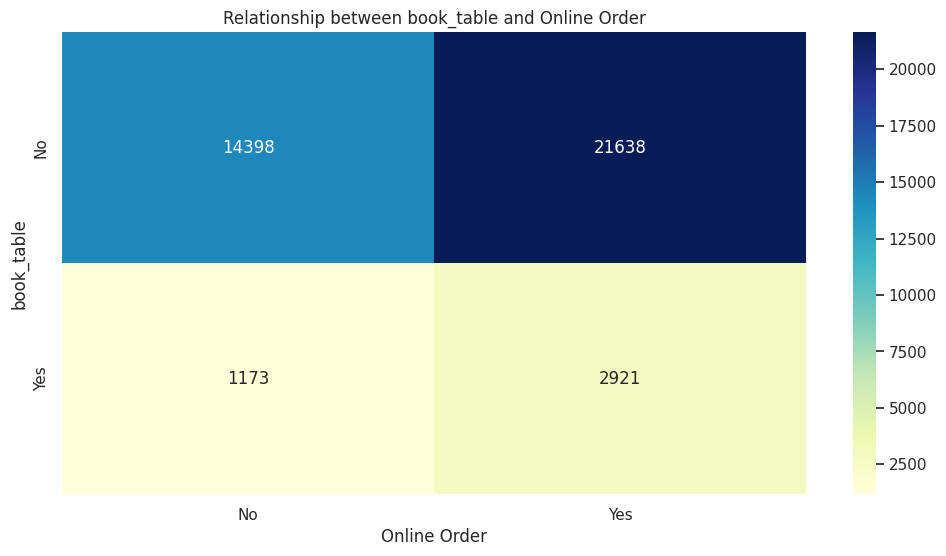

In [ ]:
# Set style for seaborn
sns.set(style="whitegrid")

# Bivariate analysis for categorical variables
for var in categorical_variables:
    # Create a crosstab to understand the relationship
    crosstab = pd.crosstab(df[var], df['online_order'])
    plt.figure(figsize=(12, 6))
    sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Relationship between {var} and Online Order')
    plt.xlabel('Online Order')
    plt.ylabel(var)
    plt.show()

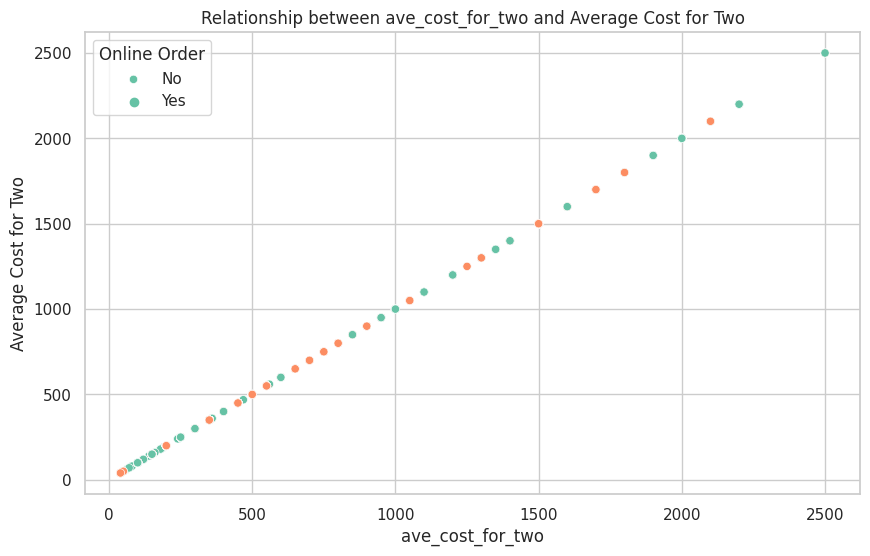

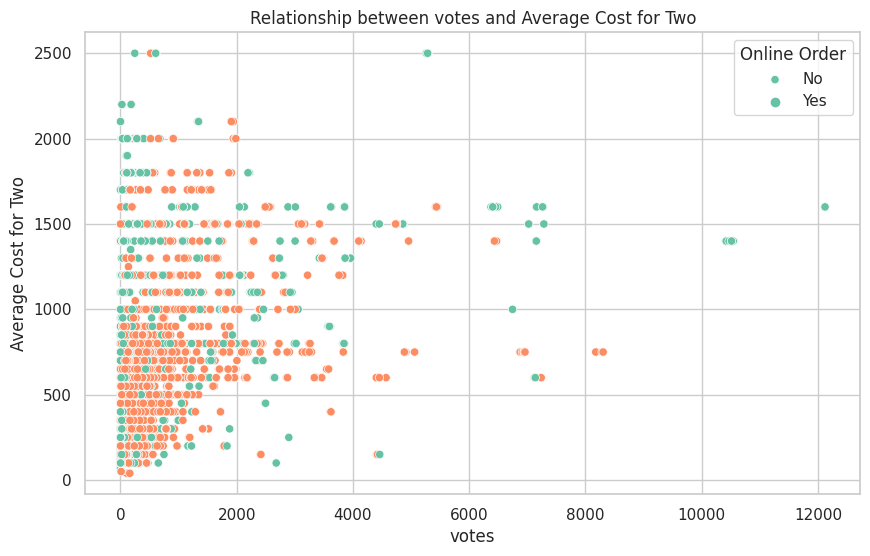

In [ ]:
# Bivariate analysis for numeric variables
for var in numeric_variables:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=var, y='ave_cost_for_two', hue='online_order', palette='Set2')
    plt.title(f'Relationship between {var} and Average Cost for Two')
    plt.xlabel(var)
    plt.ylabel('Average Cost for Two')
    plt.legend(title='Online Order', labels=['No', 'Yes'])
    plt.show()

In [ ]:
!pip install churn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.2/71.2 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: click
    Found existing installation: click 8.1.7
    Uninstalling click-8.1.7:
      Successfully uninstalled click-8.1.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fiona 1.9.4.post1 requires click~=8.0, but you have click 6.7 which is incompatible.
flask 2.2.5 requires click>=8.0, but you have click 6.7 which is incompatible.
dask 2023.8.1 requires click>=8.0, but you have click 6.7 which is incompatible.
distributed 2023.8.1 requires click>=8.0, but you have click 6.7 which is incompatible.
pip-tools 6.13.0 requires click>=8, but you have click 6.7 which is incompatible.
typer 0.9.0 requires c

In [ ]:
pip install scikit-learn pandas


In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Assume df is your DataFrame

# Select numerical features
numerical_features = ['ave_cost_for_two', 'votes']  # Add other numerical features if needed


target_variable = 'votes'  # Using 'votes' as the target variable in this example

# Drop rows with missing values in numerical features and the target variable
df.dropna(subset=numerical_features + [target_variable], inplace=True)

# Calculate MI scores
mi_scores = {}

for num_feature in numerical_features:
    mi_scores[num_feature] = mutual_info_regression(df[[num_feature]], df[target_variable])

# Convert MI scores to a DataFrame for better visualization
mi_scores_df = pd.DataFrame(mi_scores, index=['MI Score']).T.sort_values('MI Score', ascending=False)

# Display the scores
print(mi_scores_df)



                  MI Score
ave_cost_for_two  0.614612
votes             0.450379


## **One hot encoding**

In [ ]:
# apply one hot encoding to categorical data

df = pd.get_dummies(df, columns=['location', 'rest_type', 'cuisines', 'listed_in_type', 'listed_in_city', 'online_order', 'book_table'], drop_first=True)

df.head()


,address,name,phone,menu_item,ave_cost_for_two,votes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,...,listed_in_city_Malleshwaram,listed_in_city_Marathahalli,listed_in_city_New BEL Road,listed_in_city_Old Airport Road,listed_in_city_Rajajinagar,listed_in_city_Residency Road,listed_in_city_Sarjapur Road,listed_in_city_Whitefield,online_order_Yes,book_table_Yes
0,"173/218, GF, Opposite Ranka Colony, Bannerghat...",D2V Cafe,+91 9886986111\r\n+91 8550051111,[],700.0,13,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,"2nd Floor, MMR Plaza, Above DCB Bank, Sarjapur...",The Burger Place,+91 9108974600,[],400.0,28,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,"Next To Surana College, South End Circle, Basa...",Millet Mama,+91 7411918648\r\n+91 9986975625,[],200.0,18,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,"Money Chambers Double Road, Shanti Nagar, Bang...",Red Onion,+91 8867253669,"['Hyderabadi Biryani', 'Special Veg Combo', 'S...",1200.0,550,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,"Shop 67, 69, 70, Inside Ramaiah Campus, New BE...",Chaiywaala Da Dhaba,+91 8217431260\n+91 7975991975,[],250.0,67,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39890 entries, 0 to 40129
Columns: 2347 entries, address to book_table_Yes
dtypes: float64(1), int64(1), object(4), uint8(2341)
memory usage: 91.2+ MB


## **Machine Learning Models**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming you've loaded data in df already
df = pd.read_csv('FoodieBay.csv')

# Drop columns which might not be useful for predictions like 'address', 'name', 'phone'
df = df.drop(columns=['address', 'name', 'phone' , 'url' , 'dish_liked'])

# Handle missing values
df = df.dropna()

# Encode categorical variables
label_encoders = {}
for col in ['location', 'rest_type', 'cuisines', 'menu_item', 'listed_in_type', 'listed_in_city', 'online_order', 'book_table']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30699 entries, 0 to 40129
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   location            30699 non-null  int64  
 1   rest_type           30699 non-null  int64  
 2   cuisines            30699 non-null  int64  
 3   menu_item           30699 non-null  int64  
 4   listed_in_type      30699 non-null  int64  
 5   listed_in_city      30699 non-null  int64  
 6   online_order        30699 non-null  int64  
 7   book_table          30699 non-null  int64  
 8   ave_cost_for_two    30699 non-null  float64
 9   votes               30699 non-null  int64  
 10  ave_review_ranking  30699 non-null  float64
 11  rate                30699 non-null  float64
dtypes: float64(3), int64(9)
memory usage: 3.0 MB


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X = df.drop(columns=['ave_cost_for_two', 'votes'])
y = df[['ave_cost_for_two','votes']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Decision-Tree and Random-Forest**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Train a Decision Tree model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Predict using the trained model
y_pred_tree = tree_reg.predict(X_test)

# Train a Random Forest model
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

# Predict using the trained model
y_pred_forest = forest_reg.predict(X_test)

# Convert predictions to DataFrame
pred_tree_df = pd.DataFrame(y_pred_tree, columns=['pred_ave_cost_tree', 'pred_votes_tree'])
pred_forest_df = pd.DataFrame(y_pred_forest, columns=['pred_ave_cost_forest', 'pred_votes_forest'])

# Concatenate the original data with predictions and save to CSV
result_df = pd.concat([df, pred_tree_df, pred_forest_df], axis=1)
result_df.to_csv('predictions.csv', index=False)


## **LinearRegression MSE**

In [ ]:
# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, lr_preds))

Linear Regression MSE: 180889.68039117174


## **RandomForestClassifier MSE**

In [ ]:
# Model 2: Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, rf_preds))

Random Forest MSE: 27808.737427177923


## **Comparisson**

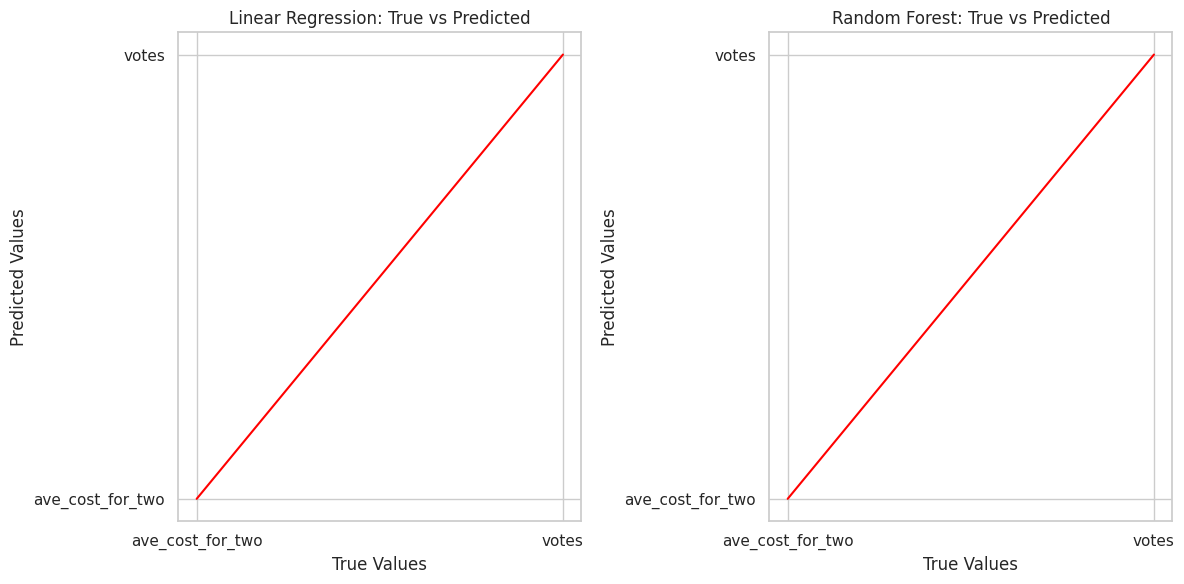

In [ ]:
import matplotlib.pyplot as plt

# Plot for Linear Regression predictions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_preds, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Ideal 1:1 line
plt.title('Linear Regression: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Plot for Random Forest predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_preds, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Ideal 1:1 line
plt.title('Random Forest: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


## **DecisionTreeClassifier**

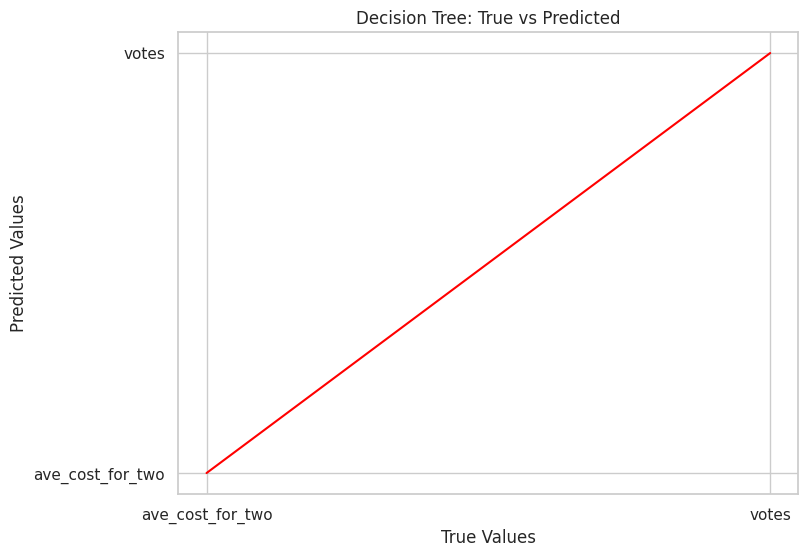

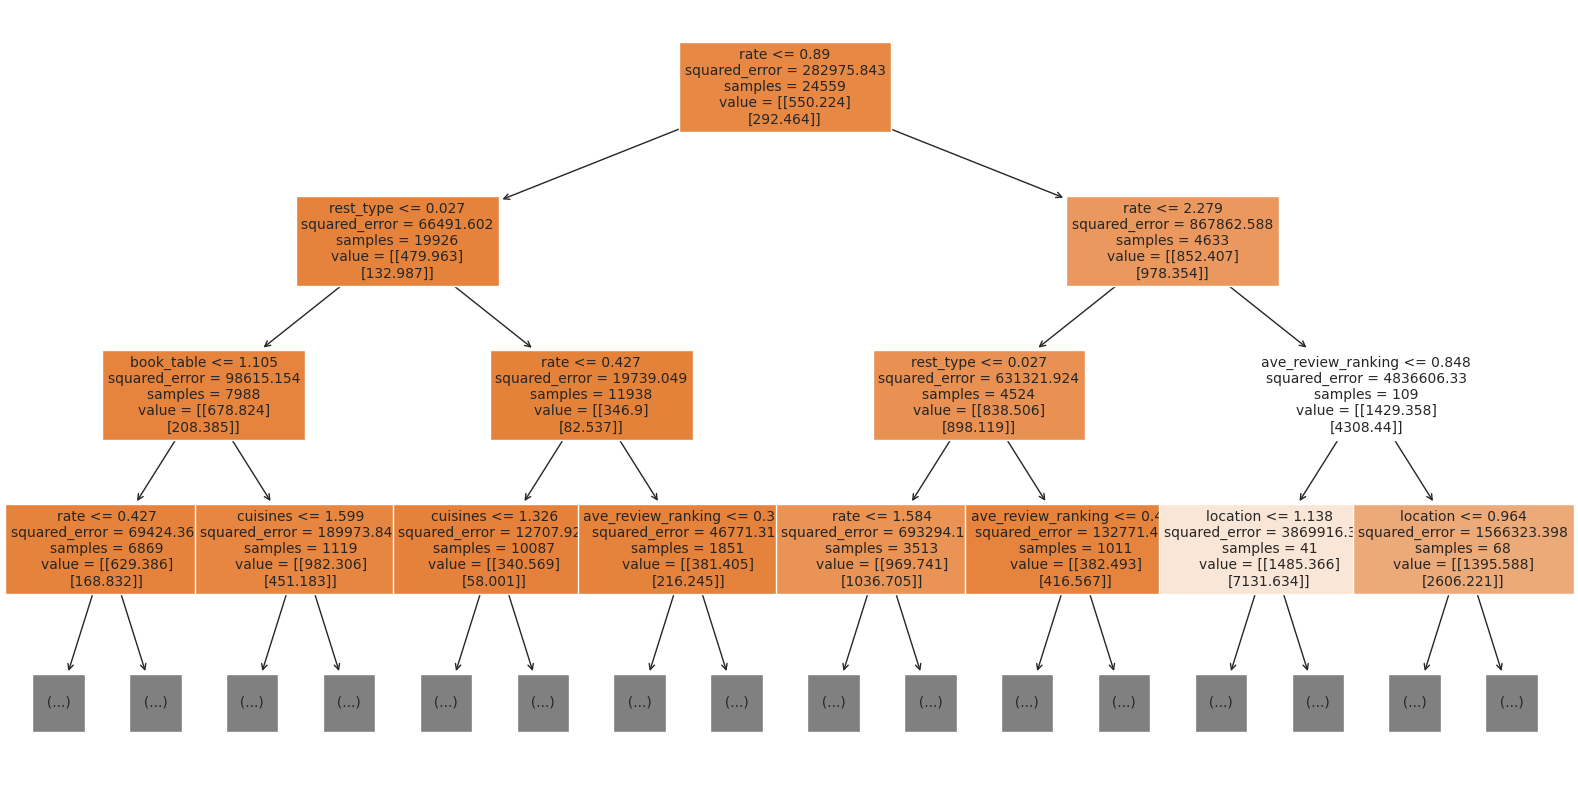

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import tree


# 1. Train the Decision Tree Model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

# 2. Visualize the Predicted vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_preds, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Ideal 1:1 line
plt.title('Decision Tree: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

# 3. Visualize the Decision Tree
# Note: Visualizing large trees can be messy. You might want to set a max_depth when initializing your DecisionTreeRegressor to limit the depth of the tree for visualization purposes.
plt.figure(figsize=(20, 10))
tree.plot_tree(dt, filled=True, feature_names=X.columns, max_depth=3, fontsize=10)
plt.show()
#The first plot gives you the scatter plot of actual values against the predicted values by the decision tree. The second plot visualizes the decision tree itself. Note that if your tree is very deep, it can produce a very large and complicated visualization, so you might want to limit the depth using the max_depth parameter during visualization or when initializing your DecisionTreeRegressor.


In [ ]:
#print decision tree predicted values

print(dt_preds)


[[400.  22.]
 [400.   9.]
 [200.  11.]
 ...
 [500.   7.]
 [250.  19.]
 [400. 213.]]


In [ ]:
!pip install scikit-learn-extra


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.8 MB/s eta 0:00:00


## **K-means and K-Mediods**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids


# Drop the target columns (if they are still in your dataframe)
X = df.drop(columns=['ave_cost_for_two', 'votes'])

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 1. Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_pca)

# 2. Applying K-Medoids clustering
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids_clusters = kmedoids.fit_predict(X_pca)

# Add clustering results back to the dataframe
df['KMeans_Clusters'] = kmeans_clusters
df['KMedoids_Clusters'] = kmedoids_clusters

# Save the dataframe with clustering results to a new CSV file
df.to_csv('data_with_clusters.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



## **Clusters Visualization**

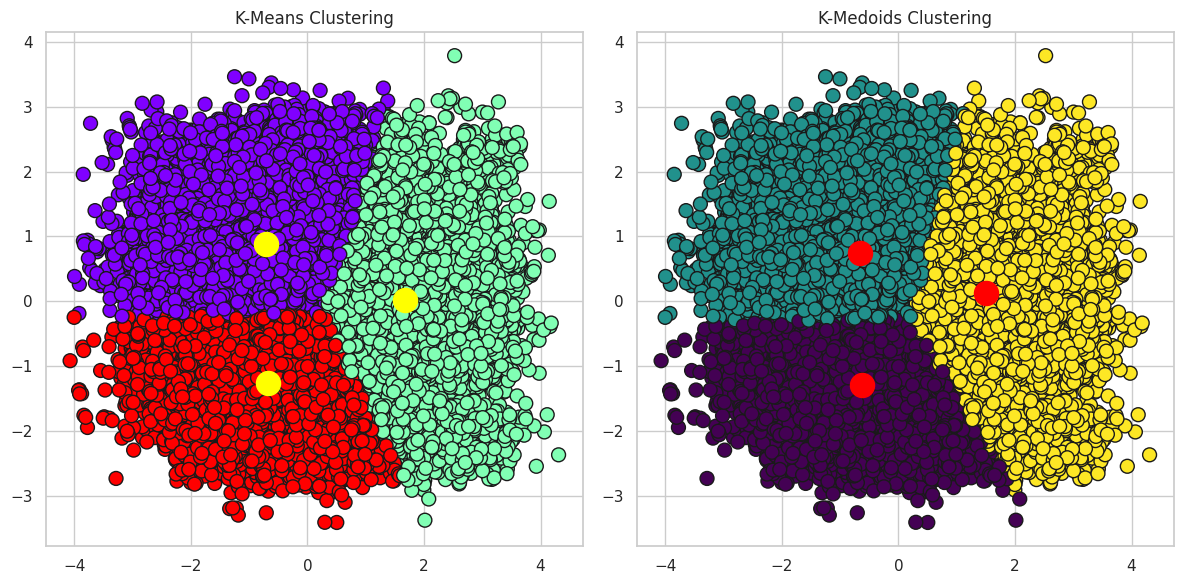

In [ ]:
import matplotlib.pyplot as plt

# Visualizing K-Means clusters
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clusters, cmap='rainbow', edgecolor='k', s=100)
plt.title("K-Means Clustering")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')

# Visualizing K-Medoids clusters
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmedoids_clusters, cmap='viridis', edgecolor='k', s=100)
plt.title("K-Medoids Clustering")
plt.scatter(X_pca[kmedoids.medoid_indices_, 0], X_pca[kmedoids.medoid_indices_, 1], s=300, c='red', label = 'Medoids')

plt.tight_layout()
plt.show()
